In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")

print("Path to dataset files:", path)

100%|██████████| 2.29G/2.29G [17:11<00:00, 2.39MB/s]

Extracting files...


Path to dataset files: C:\Users\19163\.cache\kagglehub\datasets\paultimothymooney\chest-xray-pneumonia\versions\2


In [3]:
# 🩻 Pneumonia Detection with Chest X-Ray Scans

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Paths to dataset
base_dir = 'C:/Users/19163/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray'  # TODO: Update this path
train_dir = f'{base_dir}/train'
val_dir = f'{base_dir}/val'
test_dir = f'{base_dir}/test'

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 38s 0us/step


C:\users\19163\OneDrive\desktop\my_nlp_env\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 353s 2s/step - accuracy: 0.7391 - loss: 0.5732 - val_accuracy: 0.5000 - val_loss: 0.8291
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 399s 2s/step - accuracy: 0.7379 - loss: 0.5529 - val_accuracy: 0.5000 - val_loss: 0.8201
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 378s 2s/step - accuracy: 0.7457 - loss: 0.5249 - val_accuracy: 0.5000 - val_loss: 0.7884
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 374s 2s/step - accuracy: 0.7496 - loss: 0.5063 - val_accuracy: 0.5000 - val_loss: 0.7412
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.7537 - loss: 0.4905 - val_accuracy: 0.5625 - val_loss: 0.7137
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 371s 2s/step - accuracy: 0.7510 - loss: 0.4809 - val_accuracy: 0.5000 - val_loss: 0.8350
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.7561 - loss: 0.4705 - val_accuracy: 0.5625 - val_loss: 0.7623
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 368s 2s/step - accuracy: 0.7732 - loss: 0.4451 - val_accu

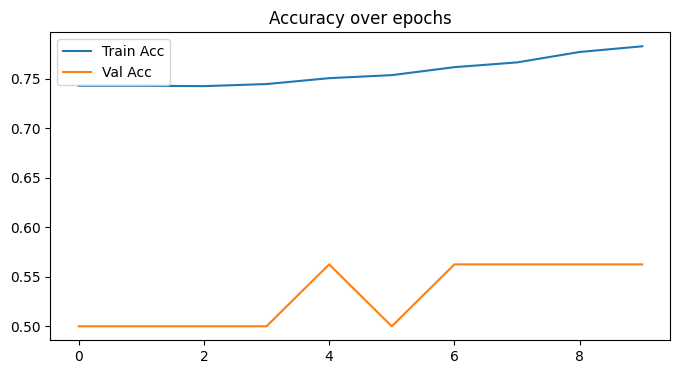

20/20 ━━━━━━━━━━━━━━━━━━━━ 40s 2s/step - accuracy: 0.4323 - loss: 0.7967
Test Accuracy: 0.69


In [4]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

# No augmentation for validation & test
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# Build the model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=x)

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)

# Plot training results
plt.figure(figsize=(8, 4))
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over epochs')
plt.legend()
plt.show()

# Evaluate on test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test Accuracy: {test_acc:.2f}')


In [ ]:
# Fine-tune last 30 layers
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

fine_tune_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5
)

# Evaluate after fine-tuning
test_loss_ft, test_acc_ft = model.evaluate(test_generator)
print(f'Post Fine-tune Test Accuracy: {test_acc_ft:.2f}')


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 504s 3s/step - accuracy: 0.7695 - loss: 0.8207 - val_accuracy: 0.5000 - val_loss: 0.6436
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 500s 3s/step - accuracy: 0.9162 - loss: 0.1885 - val_accuracy: 0.8750 - val_loss: 0.3401
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 472s 3s/step - accuracy: 0.9217 - loss: 0.1891 - val_accuracy: 0.6250 - val_loss: 0.8331
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 459s 3s/step - accuracy: 0.9390 - loss: 0.1620 - val_accuracy: 0.6875 - val_loss: 0.8423
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 458s 3s/step - accuracy: 0.9332 - loss: 0.1595 - val_accuracy: 0.8125 - val_loss: 0.3392
20/20 ━━━━━━━━━━━━━━━━━━━━ 39s 2s/step - accuracy: 0.8842 - loss: 0.2436
Post Fine-tune Test Accuracy: 0.82
